In [78]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os

sns.set(rc={'figure.figsize':(20,14)})

In [79]:
data_folder = "../data/nemea_results__20210222/multithreaded"

os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    return benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "") #.replace("_1", "")
    return benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "") #.replace("_1", "")
high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
high_level = high_level.sort_values("benchmark_run_name")
high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
high_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 1]) for b in high_level["benchmark_run_name"]]
high_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 1]) for b in high_level["fancy_name"]]
high_level = high_level.sort_values("num_clients")
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name,codec_name,num_clients
8,./tpch_bitpacking_compactvector_5.json,1.419501e+09,8.544652,./bitpacking_compactvector_5,./tpch_bitpacking_compactvector,5
13,./tpch_bitpacking_turbopfor_5.json,1.405320e+09,8.721409,./bitpacking_turbopfor_5,./tpch_bitpacking_turbopfor,5
3,./tpch_bitpacking_turbopfor_seq_5.json,1.498189e+09,8.012811,./bitpacking_turbopfor_seq_5,./tpch_bitpacking_turbopfor_seq,5
10,./tpch_dictionary_5.json,1.353458e+09,9.130066,./dictionary_5,./tpch_dictionary,5
9,./tpch_fsba_5.json,1.353083e+09,9.065946,./fsba_5,./tpch_fsba,5
12,./tpch_bitpacking_compactvector_10.json,1.665141e+09,14.560032,./bitpacking_compactvector_10,./tpch_bitpacking_compactvector,10
2,./tpch_bitpacking_turbopfor_10.json,1.673228e+09,15.167550,./bitpacking_turbopfor_10,./tpch_bitpacking_turbopfor,10
4,./tpch_bitpacking_turbopfor_seq_10.json,1.836535e+09,12.661306,./bitpacking_turbopfor_seq_10,./tpch_bitpacking_turbopfor_seq,10
5,./tpch_dictionary_10.json,1.593607e+09,15.708569,./dictionary_10,./tpch_dictionary,10
11,./tpch_fsba_10.json,1.620506e+09,15.496121,./fsba_10,./tpch_fsba,10


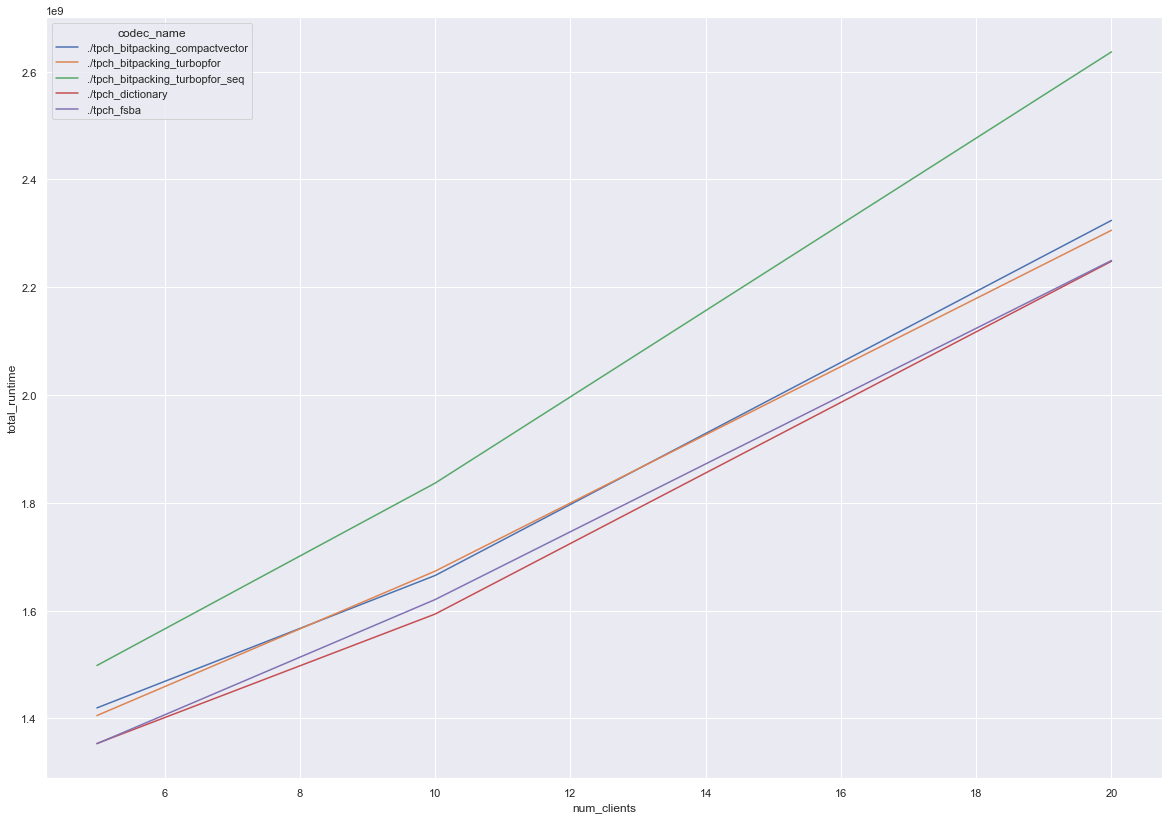

In [80]:

plot = sns.lineplot(data=high_level, x="num_clients", y="total_runtime", hue="codec_name")
plt.savefig(f"visualizations/tpch_multi_compression_high_level_both.svg", format="svg")

#plot_high_level(
 #   high_level[high_level["benchmark_run_name"].str.match(".*LTO.*")],
 #   "tpch_compression_high_level_with_lto")

<AxesSubplot:xlabel='Library/Codec', ylabel='Total Runtime TPCH SF10 in ms'>

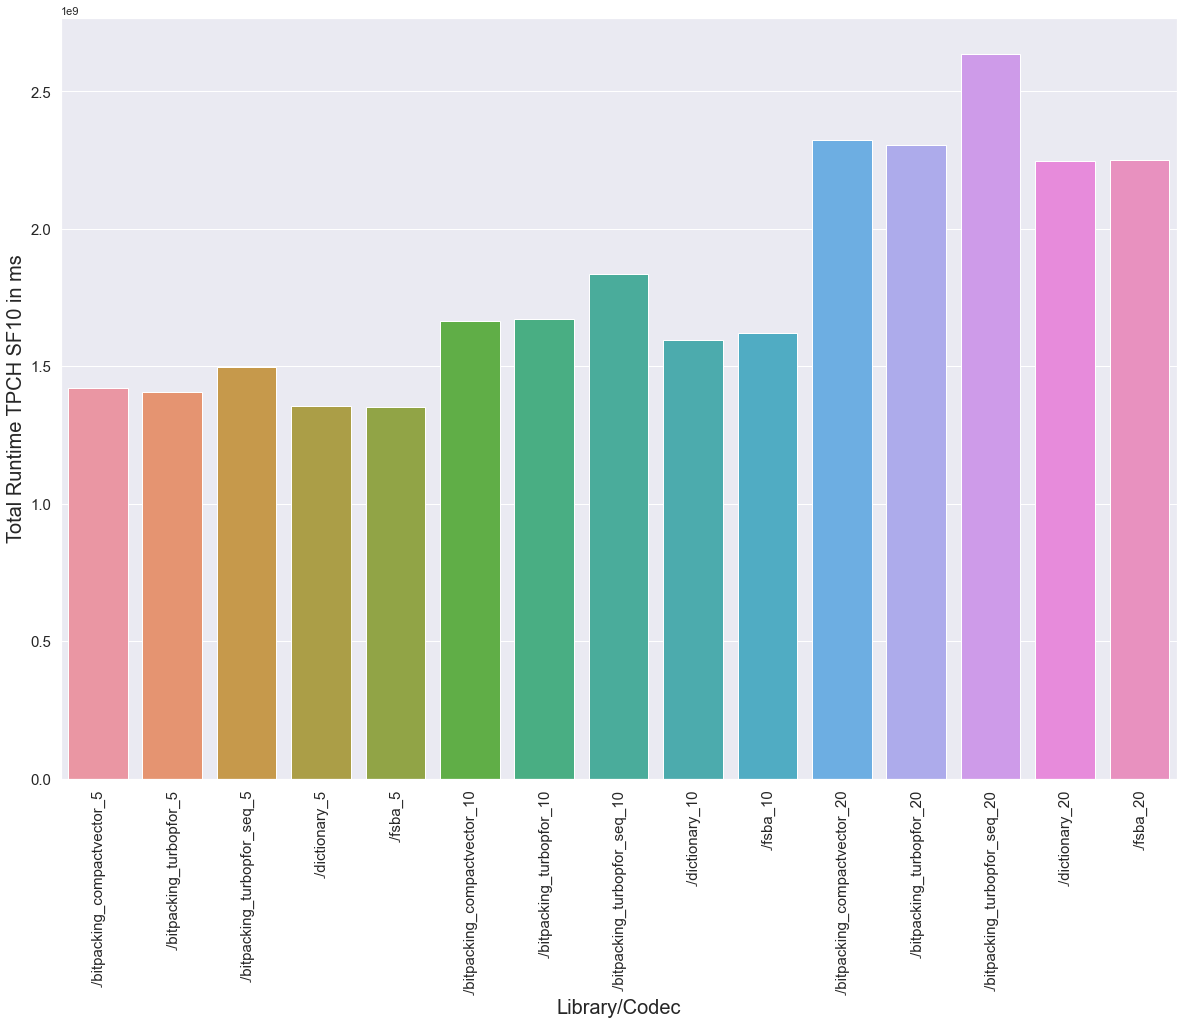

In [81]:
def plot_high_level(d, filename, plot=None):
    plt.tight_layout()
    if plot is None:
        plot = sns.barplot(data=d, x="fancy_name", y="total_runtime")
    # plot.set(ylim=(1.5 * 10**9, 2.05 * 10**9))
    plot.set_xlabel("Library/Codec",fontsize=20)
    plot.set_ylabel("Total Runtime TPCH SF10 in ms",fontsize=20) 
    plot.tick_params(labelsize=15)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

    plt.savefig(f"visualizations/{filename}.svg", format="svg")
    return plot
plot_high_level(
    high_level,
    "tpch_multi_compression_high_level_without_lto")

In [82]:
low_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_low_level.csv")

def fancy_query_name(q):
    return q.replace("TPC-H ", "")

low_level["fancy_name"] = [fancy_name(b) for b in low_level["benchmark_run_name"]]
low_level["query_name"] = [fancy_query_name(b) for b in low_level["query_name"]]
low_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 1]) for b in low_level["benchmark_run_name"]]
low_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 1]) for b in low_level["fancy_name"]]

low_level = low_level.sort_values("query_name")
low_level = low_level[~low_level["benchmark_run_name"].str.match(".*(simdbp|dict).*")]
low_level

,benchmark_run_name,query_name,avg_duration,throughput,fancy_name,codec_name,num_clients
22,./tpch_bitpacking_turbopfor_seq_20.json,01,1.089595e+10,1.670921,./bitpacking_turbopfor_seq_20,./tpch_bitpacking_turbopfor_seq,20
88,./tpch_bitpacking_turbopfor_seq_10.json,01,7.547893e+09,1.233301,./bitpacking_turbopfor_seq_10,./tpch_bitpacking_turbopfor_seq,10
242,./tpch_fsba_10.json,01,6.183044e+09,1.533190,./fsba_10,./tpch_fsba,10
286,./tpch_bitpacking_turbopfor_5.json,01,5.613037e+09,0.833207,./bitpacking_turbopfor_5,./tpch_bitpacking_turbopfor,5
198,./tpch_fsba_5.json,01,5.539874e+09,0.866549,./fsba_5,./tpch_fsba,5
...,...,...,...,...,...,...,...
263,./tpch_fsba_10.json,22,2.520401e+08,36.635907,./fsba_10,./tpch_fsba,10
307,./tpch_bitpacking_turbopfor_5.json,22,2.082596e+08,22.640724,./bitpacking_turbopfor_5,./tpch_bitpacking_turbopfor,5
43,./tpch_bitpacking_turbopfor_seq_20.json,22,5.660173e+08,30.699685,./bitpacking_turbopfor_seq_20,./tpch_bitpacking_turbopfor_seq,20
219,./tpch_fsba_5.json,22,1.969074e+08,24.356867,./fsba_5,./tpch_fsba,5


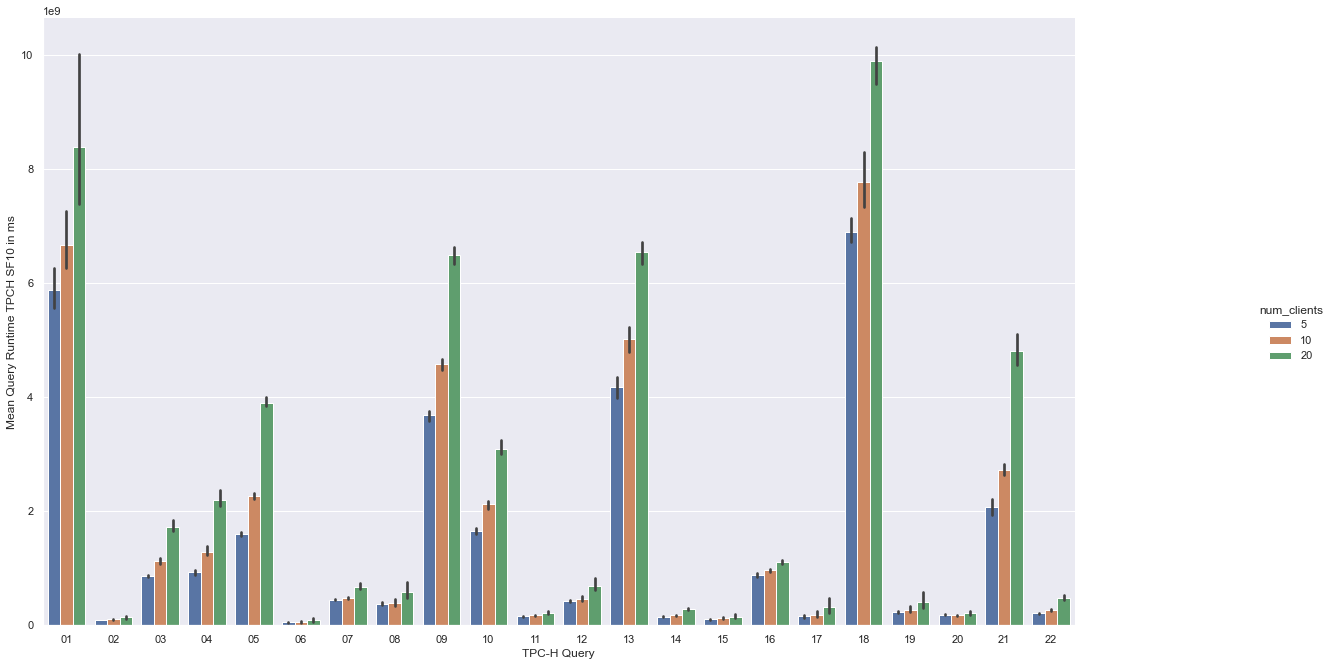

In [88]:
plot = sns.catplot(data=low_level, x="query_name", y="avg_duration", kind="bar", hue="num_clients")
plot.set_axis_labels("TPC-H Query", "Mean Query Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(20 ,10)
for ax in plot.axes.flat:
    ax.yaxis.set_major_formatter(MagnitudeFormatter(9))
plt.savefig(f"visualizations/tpch_multi_compression_low_level_absolute.svg", format="svg")

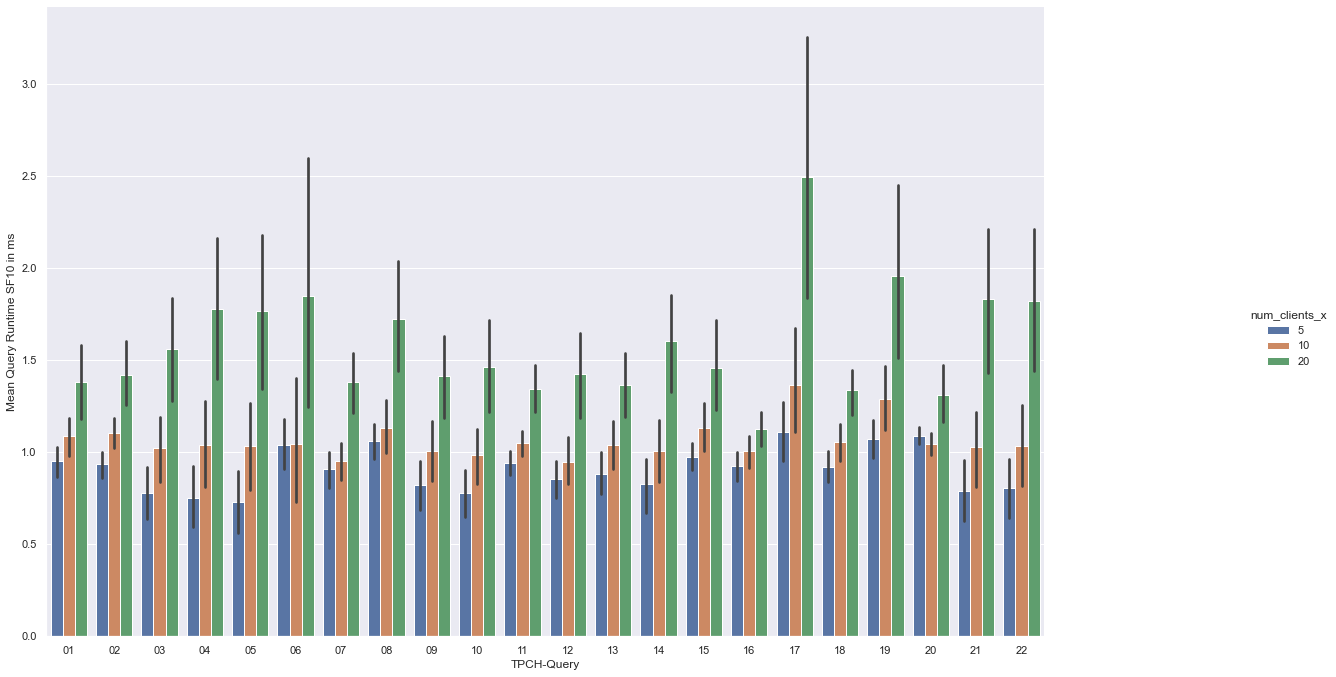

In [86]:

plot = sns.catplot(data=no_default, x="query_name", y="duration_percentage", kind="bar", hue="num_clients_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")

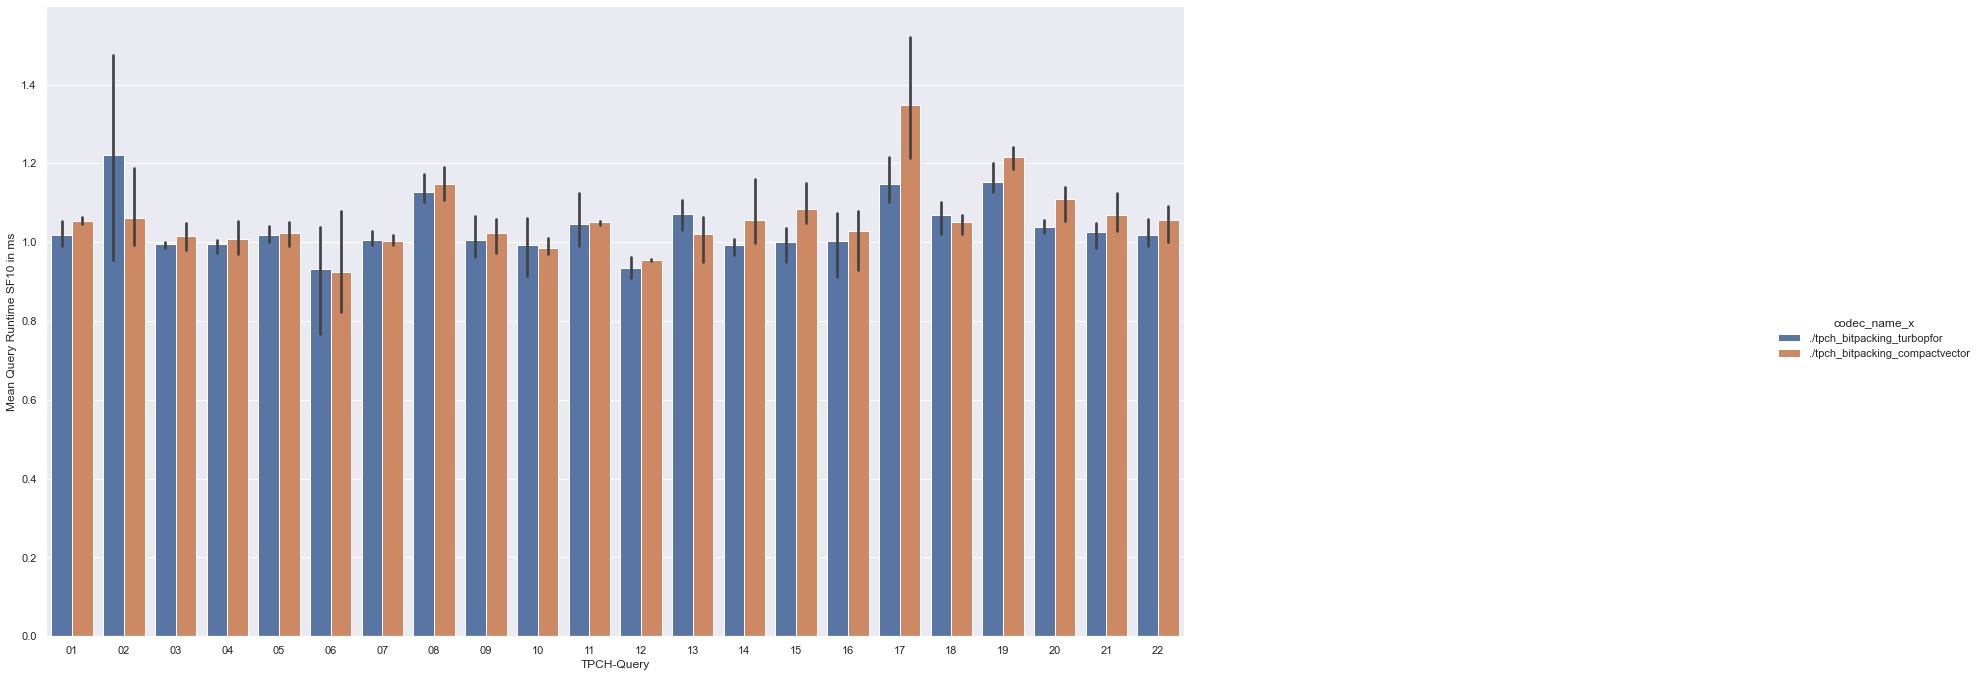

In [96]:
low_level["key"] = low_level["query_name"] + low_level["num_clients"].astype(str)
default_query_durations = low_level[low_level["benchmark_run_name"].str.match(".*tpch_fsba_.*")]
merged = low_level.merge(default_query_durations, how="left", left_on="key", right_on="key")
merged["duration_percentage"] = merged["avg_duration_x"] / merged["avg_duration_y"]
filtered = merged[~merged["benchmark_run_name_x"].str.match(".*(fsba|turbopfor_seq).*")]
plot = sns.catplot(data=filtered, x="query_name_x", y="duration_percentage", kind="bar", hue="codec_name_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(30,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")
plt.show()

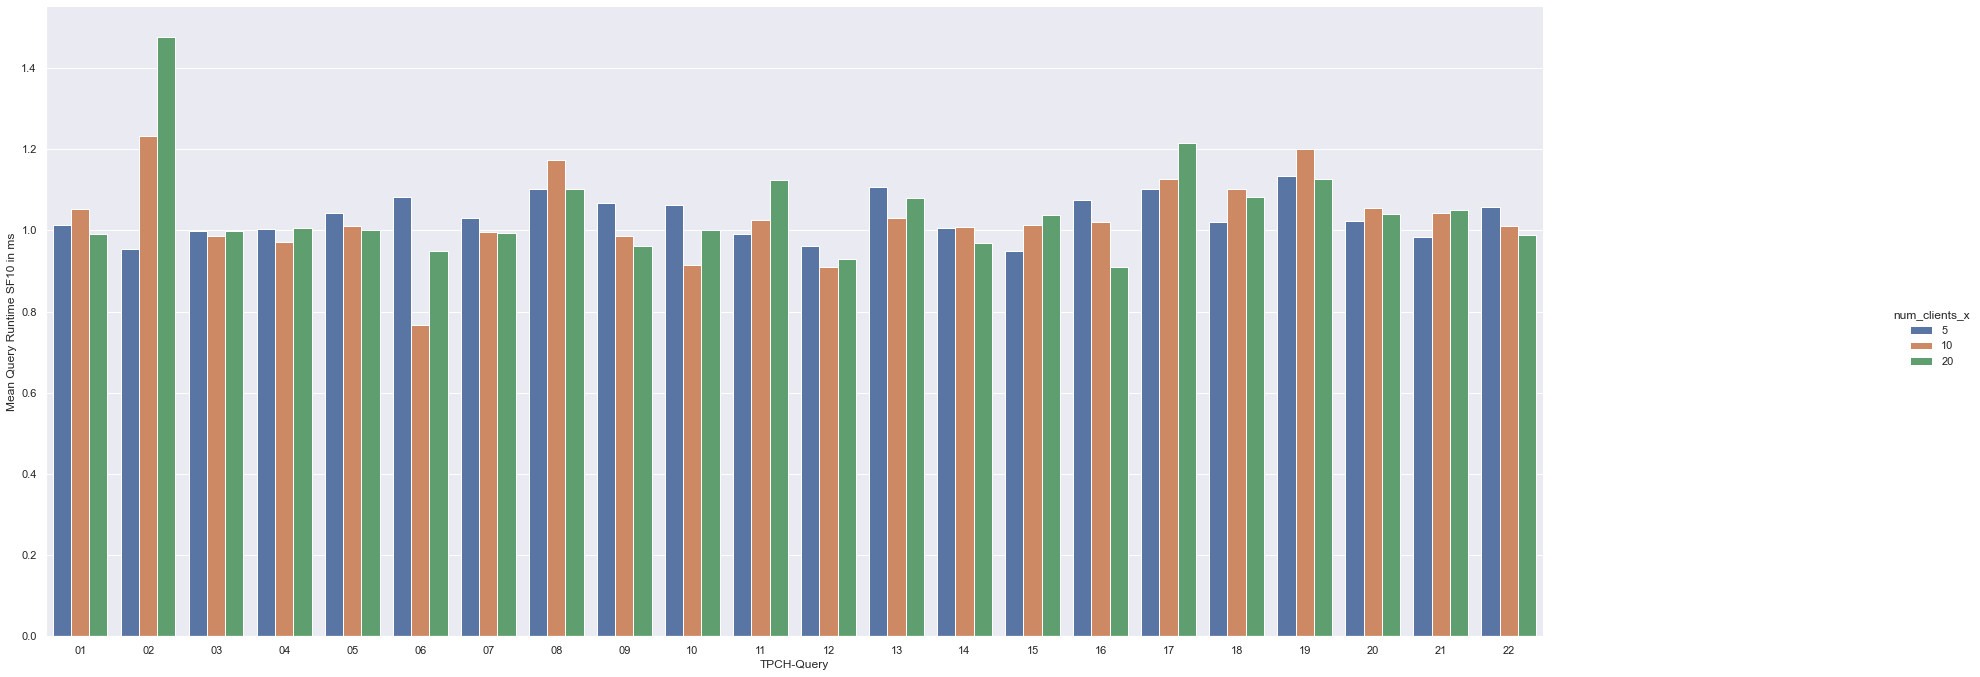

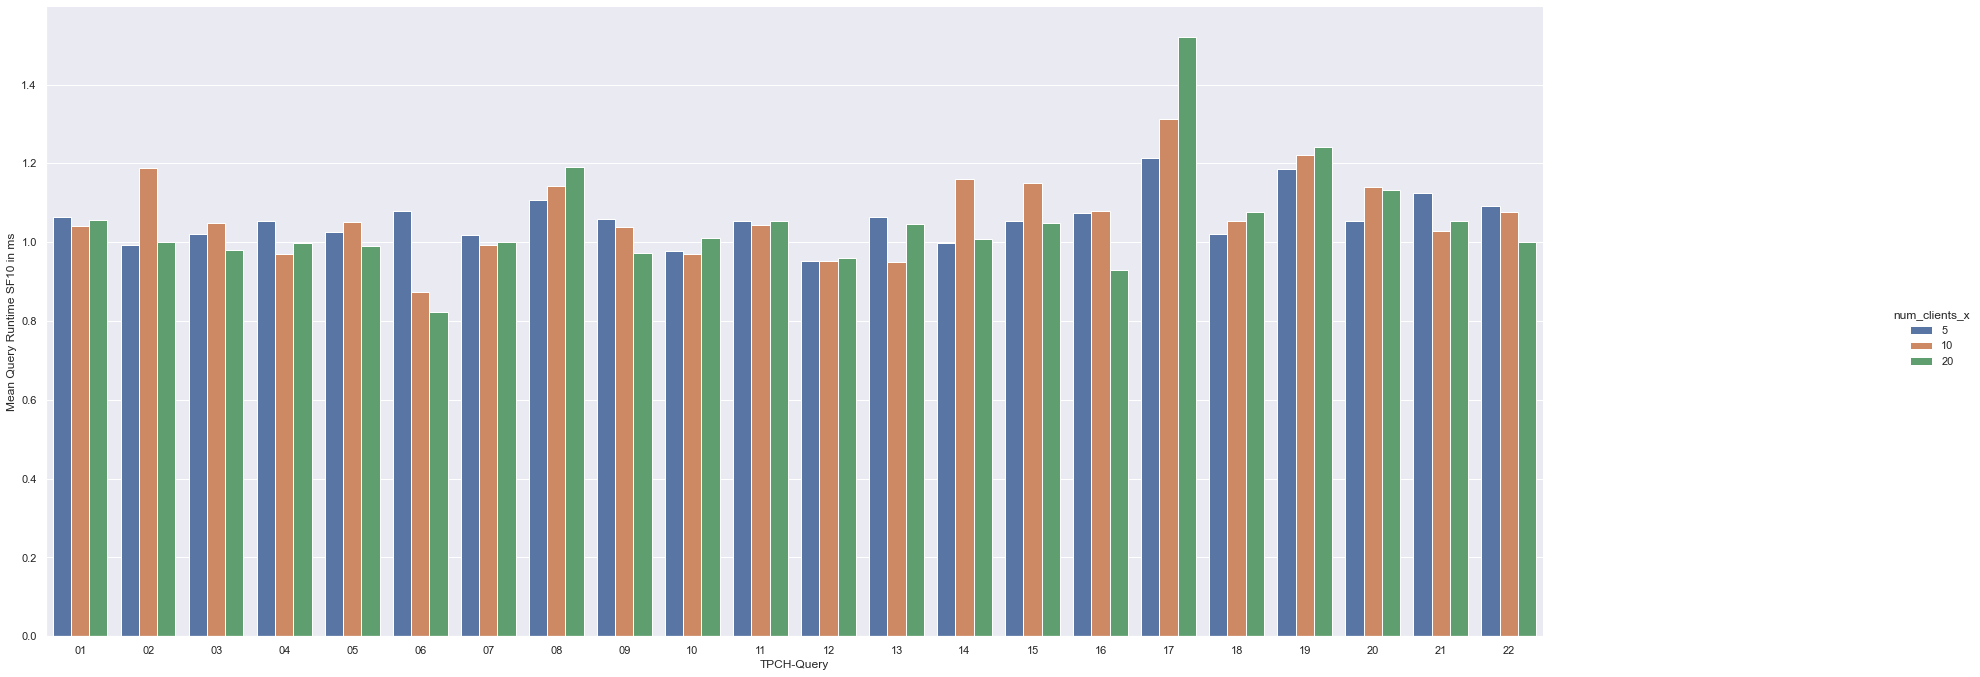

In [100]:
for n in ["bitpacking_turbopfor", "bitpacking_compactvector"]:
    f = filtered[filtered["codec_name_x"].str.match(f".*{n}.*")]
    plot = sns.catplot(data=f, x="query_name_x", y="duration_percentage", kind="bar", hue="num_clients_x")
    plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
    plot.fig.set_size_inches(30,10)
    plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")
    plt.show()

### weird, why are both of our schemes bitpacking_turbopfor and bitpacking_compactvector worde in queries 2, 17 and better in query 6? what is going on?